In [28]:
import pandas as pd
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# load data
df = pd.read_csv('/Users/h/Downloads/test.tsv', sep = '\t')

In [11]:
df.columns

Index(['sub', 'cuetype', 'stimintensity', 'EXPECT_demean', 'NPSpos'], dtype='object')

In [20]:
# df[['cuetype_num', 'stimintensity_num']] = df[['cuetype', 'stimintensity']].astype(float)
# df['cuetype_num'] = df['cuetype'].apply(pd.to_numeric, errors='coerce')
# df['stimintensity_num'] = df['stimintensity'].apply(pd.to_numeric, errors='coerce')
df[['stimintensity_num', 'cuetype_num']] = df[['stimintensity', 'cuetype']].apply(lambda x: pd.factorize(x)[0])

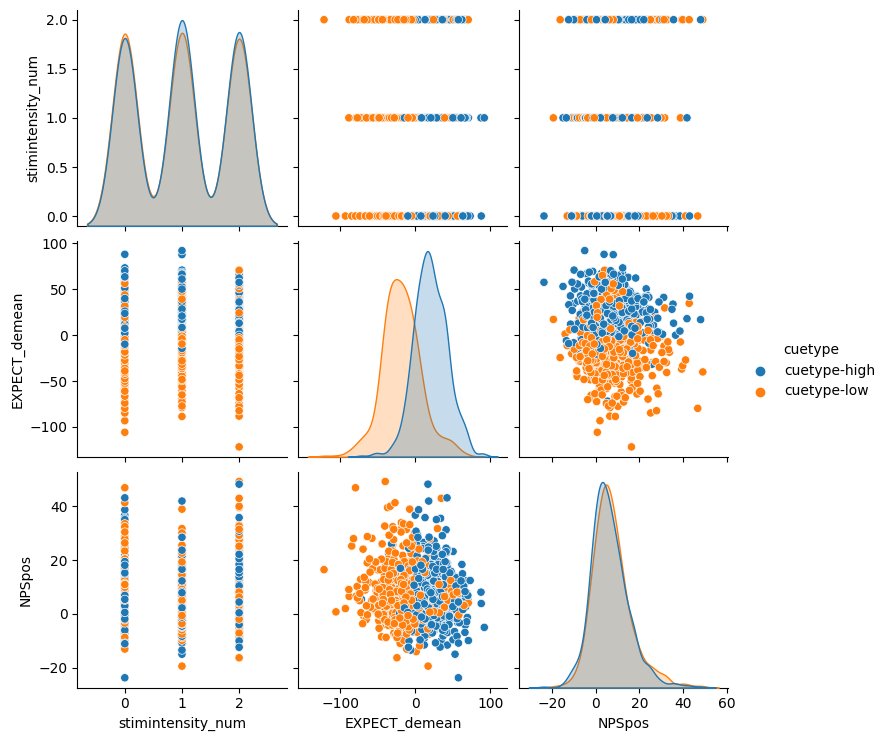

In [21]:
sns.pairplot(df, vars=['stimintensity_num', 'EXPECT_demean', 'NPSpos'], hue="cuetype")

In [40]:
df = df.dropna()
df.stimintensity.value_counts()
df['cue_stim'] = df['cuetype'].astype(str) + df['stimintensity'].astype(str)
df.head()

,sub,cuetype,stimintensity,EXPECT_demean,NPSpos,cuetype_num,stimintensity_num,cue_stim
0,sub-0015,cuetype-high,med,-72.044062,5.444231,0,0,cuetype-highmed
1,sub-0015,cuetype-high,low,5.476380,2.158616,0,1,cuetype-highlow
2,sub-0015,cuetype-low,med,-93.385979,1.967321,1,0,cuetype-lowmed
3,sub-0015,cuetype-high,high,-1.634702,7.724682,0,2,cuetype-highhigh
4,sub-0015,cuetype-high,high,-5.351548,2.030423,0,2,cuetype-highhigh


In [72]:
reducer = umap.UMAP()

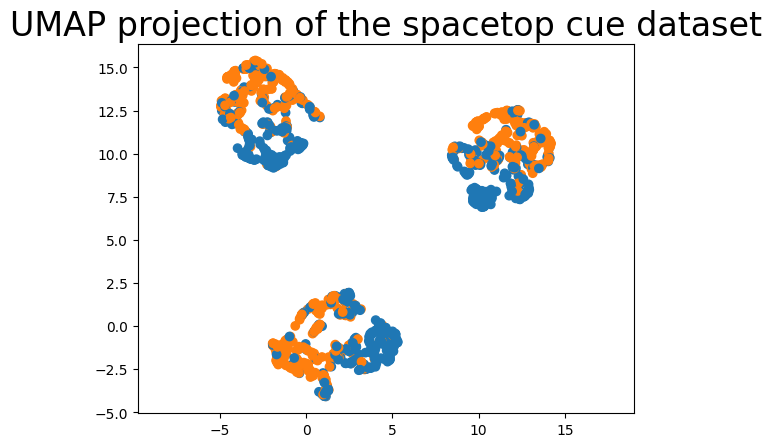

In [76]:
df_reduce = df[
    [   
        "stimintensity_num",
        "EXPECT_demean",
        "NPSpos",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(df_reduce)

embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.cuetype.map(
    {"cuetype-low":0,"cuetype-high":1}
    # {"cuetype-lowlow":0, "cuetype-lowmed":1, "cuetype-lowhigh":2,
    #  "cuetype-highlow":3, "cuetype-highmed":4, "cuetype-highhigh":5}
     )])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spacetop cue dataset', fontsize=24);

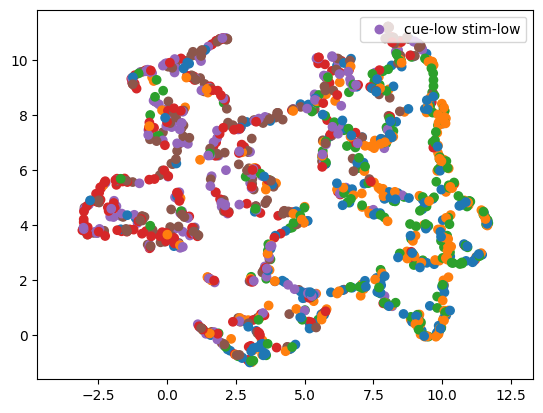

In [102]:
df_reduce = df[
    [   

        "EXPECT_demean",
        "NPSpos",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(df_reduce)

embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape
fig = plt.figure()
# ax = fig.add_subplot(111) # projection='3d')
scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.cue_stim.map(
    {"cuetype-lowlow":0, "cuetype-lowmed":1, "cuetype-lowhigh":2,
     "cuetype-highlow":3, "cuetype-highmed":4, "cuetype-highhigh":5}
     )])

plt.gca().set_aspect('equal', 'datalim')
# ax.title('UMAP projection of the spacetop cue dataset', fontsize=24);
# plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
# handles, labels = ax.get_legend_handles_labels()

# reverse the order
# ax.legend(['cue-low stim-low', 'cue-low stim-med', 'cue-low stim-high',
#            'cue-high stim-low', 'cue-high stim-med', 'cue-high stim-high']) #handles[::-1], labels[::-1])
plt.legend(['cue-low stim-low', 'cue-low stim-med', 'cue-low stim-high',
           'cue-high stim-low', 'cue-high stim-med', 'cue-high stim-high'], loc='upper right')
# plt.legend()
# plt.legend(handles=scatter.legend_elements()[0], labels=['cue-low stim-low', 'cue-low stim-med', 'cue-low stim-high',
#            'cue-high stim-low', 'cue-high stim-med', 'cue-high stim-high'])
plt.show()


In [105]:
patches, _ = ax.get_legend_handles_labels()
labels = ['cue-low stim-low', 'cue-low stim-med', 'cue-low stim-high',
           'cue-high stim-low', 'cue-high stim-med', 'cue-high stim-high']
ax.legend(*patches, labels, loc='best')

plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.15)
plt.show()

<Figure size 640x480 with 0 Axes>

In [106]:
ax.containers[0].set_label('_nolegend')
for bar, tick_label in zip(ax.containers[0], ax.get_xticklabels()):
    bar.set_label(tick_label.get_text())

IndexError: list index out of range

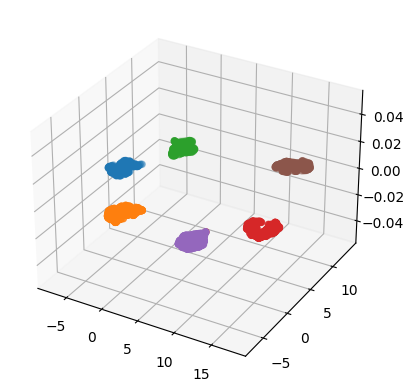

In [115]:
df_reduce = df[
    [   
    "cuetype_num",
        "stimintensity_num",
        "EXPECT_demean",
        "NPSpos",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(df_reduce)

embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape
ax = plt.axes(projection='3d')
ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.cue_stim.map(
    # {"cuetype-low":0,"cuetype-high":1}
    {"cuetype-lowlow":0, "cuetype-lowmed":1, "cuetype-lowhigh":2,
     "cuetype-highlow":3, "cuetype-highmed":4, "cuetype-highhigh":5}
     )])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the spacetop cue dataset', fontsize=24);